### Why is the medical bill so high?
A data-based approach using New York Hospital Inpatient Discharges data from 2015.

US has one the most expensive healthcare systems in the world. According to the Center for Medicare and Medicaid Services, in 2019, average healthcare cost per person is $11,172 while the medican household income was 68703. That is, in US on average people spent 16 percent of their income on healthcare related expenses.

In this project, I am going to use New York Hospital Inpatient Discharges data to explore what metrics contribute most to the medical bill.

In [1]:
#imports for this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv file to dataframe
df = pd.read_csv('./Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv', low_memory=False)
#data preview
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


### Understanding the Data

For this project, I took the publicly available New York State Hospital Inpatient Discharges dataset. It contains over 2.3M records and has 34 attributes. Out of 34 attributes, 11 are numerical and 23 are categorical variables. Data includes features such as treatment, diagnosis code, number of days spent at the hospital, race, gender, and total cost for each medical procedure. This dataset, however, does not contain any protected health information (PHI) under the Health Insurance Portability and Accountability Act (HIPAA). Any individually identifiable information is removed from the dataset. This dataset only contains data for the patients who were hospitalized for at least 1 day for the medical procedure.

To start, lets generate descriptive statistics of numerical data.

In [3]:
# descriptive statistics for numerical data
df.describe()

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.341467e+06,2.341467e+06,2346931.0,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06
mean,5.007219e+06,1.043369e+03,2015.0,1.905617e+02,1.127634e+02,4.181795e+02,1.043054e+01,2.010577e+00,3.223480e+02,4.321481e+04,1.473254e+04
std,2.259649e+06,7.133684e+02,0.0,1.596361e+02,8.892976e+01,2.413585e+02,5.924058e+00,8.974118e-01,9.842375e+02,8.046009e+04,2.819890e+04
min,1.010000e+05,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,2015.0,1.060000e+02,0.000000e+00,2.010000e+02,5.000000e+00,1.000000e+00,0.000000e+00,1.202861e+04,4.410150e+03
50%,5.907001e+06,1.099000e+03,2015.0,1.590000e+02,1.320000e+02,3.830000e+02,9.000000e+00,2.000000e+00,0.000000e+00,2.348637e+04,8.191270e+03
75%,7.002012e+06,1.450000e+03,2015.0,2.180000e+02,2.160000e+02,6.400000e+02,1.500000e+01,3.000000e+00,0.000000e+00,4.661670e+04,1.577182e+04
max,7.004010e+06,9.431000e+03,2015.0,9.170000e+02,9.990000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.000000e+03,7.248391e+06,3.007713e+06


Now, let view a concise summary of our dataframe including index dtype and columns.

In [4]:
#dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346931 entries, 0 to 2346930
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

from the information above, we can state that this is a fairly large dataset with over 2.3M rows and over 608 MB in size.

In [5]:
#For the sake of simplicity in programing, lets replace space in column name with '_'
df.columns = [column.replace(" ", "_") for column in df.columns]
df.rename(columns={'Zip_Code_-_3_digits':'Zip_Code_3_digits'}, inplace=True)

In [6]:
#display the column names
df.columns

Index(['Health_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Facility_Id', 'Facility_Name',
       'Age_Group', 'Zip_Code_3_digits', 'Gender', 'Race', 'Ethnicity',
       'Length_of_Stay', 'Type_of_Admission', 'Patient_Disposition',
       'Discharge_Year', 'CCS_Diagnosis_Code', 'CCS_Diagnosis_Description',
       'CCS_Procedure_Code', 'CCS_Procedure_Description', 'APR_DRG_Code',
       'APR_DRG_Description', 'APR_MDC_Code', 'APR_MDC_Description',
       'APR_Severity_of_Illness_Code', 'APR_Severity_of_Illness_Description',
       'APR_Risk_of_Mortality', 'APR_Medical_Surgical_Description',
       'Payment_Typology_1', 'Payment_Typology_2', 'Payment_Typology_3',
       'Birth_Weight', 'Abortion_Edit_Indicator',
       'Emergency_Department_Indicator', 'Total_Charges', 'Total_Costs'],
      dtype='object')

### Data Cleaning/Preparation

#### 1. Missing Data

In [7]:
#display missing values for each columns
df.isna().sum()

Health_Service_Area                       5464
Hospital_County                           5464
Operating_Certificate_Number              5464
Facility_Id                               5464
Facility_Name                                0
Age_Group                                    0
Zip_Code_3_digits                        35816
Gender                                       0
Race                                         0
Ethnicity                                    0
Length_of_Stay                               0
Type_of_Admission                            0
Patient_Disposition                          0
Discharge_Year                               0
CCS_Diagnosis_Code                           0
CCS_Diagnosis_Description                    0
CCS_Procedure_Code                           0
CCS_Procedure_Description                    0
APR_DRG_Code                                 0
APR_DRG_Description                          0
APR_MDC_Code                                 0
APR_MDC_Descr

In our dataset, Payment_Typology_2, Payment_Typology_3 have most missing values. Since, we are mostly interested in Paytment_Typology_1, we will drop Payment_Typology_2 and Payment_Typology_3 columns.

In [8]:
# drop columns Payment_Typology_2 and Payment_Typology_3
df.drop(['Payment_Typology_2', 'Payment_Typology_3'], axis=1, inplace=True)

For columns such as ***Health_Service_Area, Hospital_County, Operating_Certificate_Number, Facility_Id, APR_Severity_of_Illness_Description, and APR_Risk_of_Mortality*** have very few missing values, we will drop the rows with missing values.

In [9]:
# drop rows with missing values for following columns
df.dropna(axis=0, subset=['Health_Service_Area', 'Hospital_County',
                          'Operating_Certificate_Number',
                          'Facility_Id',
                          'APR_Severity_of_Illness_Description',
                          'APR_Risk_of_Mortality'], inplace=True)

In [10]:
# number of missing values for Zip_Code_3_digits
df.Zip_Code_3_digits.isna().sum()


30351

After removing some roms with missing values for columns such as Health_Service_Area, Hospital_County, Operating_Certificate_Number, Facility_Id, APR_Severity_of_Illness_Description, and APR_Risk_of_Mortality, there are still 30351 missing values for zid code.. 

In [11]:
#percentage of missing values for Zip_Code_3_digits
(df.Zip_Code_3_digits.isna().sum()/df.shape[0])*100

1.2962995391134287

That is about 1.3% percent missing values. This is quite significant just to drop 30000 rows, so we need to figure out a way to how handle missing values. One option would be simply impute missing value with mode or most frequent zip code in our Zip_Code_3_digits column. 

In [12]:
# top five zip codes
df.Zip_Code_3_digits.value_counts(sort=True, dropna=False)[0:5]

112    310777
104    221640
117    181068
100    167790
113    120340
Name: Zip_Code_3_digits, dtype: int64

If we impute using mode from the Zip_Code_3_digits for the missing values, all the nan would get 112 as a new value. 

In [13]:
# get each counties that share the Zip_Code_3_digits 112
df[df.Zip_Code_3_digits == '112']['Hospital_County'].value_counts()

Kings          224405
Manhattan       65586
Queens           9757
Richmond         3666
Nassau           2618
Bronx            2111
Westchester      2031
Suffolk           210
Rockland          120
Orange             92
Sullivan           54
Dutchess           42
Albany             28
Ulster             21
Onondaga           11
Erie                6
Broome              4
Columbia            4
Schenectady         4
Rensselaer          3
Monroe              2
Clinton             2
Name: Hospital_County, dtype: int64

Zip code 112 covers 22 unique counties in New York state, so it may not be a bad idea to impute with this value. But before I finalize, I want to see zip code distribution of missing values for all counties. 

In [14]:
# how many counties are there in our dataset?
df.Hospital_County.nunique()

57

In [15]:
# check the spread of missing Zip_Code_3_digits accross Hosptial County.
df[df.Zip_Code_3_digits.isna()]['Hospital_County'].describe()

count         30351
unique           57
top       Manhattan
freq           6899
Name: Hospital_County, dtype: object

Looks like missing values are comming from all the counties in the state. Therefore, I am going to group each zip code by counties and impute with missing values with mode zip code for each county. 

Note:
Regardless our imputation approach, we should be very cautious of the BIAS we are imputing into any model that uses these imputed values. Though imputing values is very common, and often leads to better predictive power in machine learning models, it can also lead to over generalizations.

In [16]:
#create temp df for Zip_Code_3_digits with imputed values
temp_zip=df.groupby(['Hospital_County'])['Zip_Code_3_digits'].apply(lambda x:x.fillna(x.mode()[0]))

In [17]:
#replace old zip code with temp zip code
df.Zip_Code_3_digits = temp_zip

In [18]:
df.isna().sum()

Health_Service_Area                    0
Hospital_County                        0
Operating_Certificate_Number           0
Facility_Id                            0
Facility_Name                          0
Age_Group                              0
Zip_Code_3_digits                      0
Gender                                 0
Race                                   0
Ethnicity                              0
Length_of_Stay                         0
Type_of_Admission                      0
Patient_Disposition                    0
Discharge_Year                         0
CCS_Diagnosis_Code                     0
CCS_Diagnosis_Description              0
CCS_Procedure_Code                     0
CCS_Procedure_Description              0
APR_DRG_Code                           0
APR_DRG_Description                    0
APR_MDC_Code                           0
APR_MDC_Description                    0
APR_Severity_of_Illness_Code           0
APR_Severity_of_Illness_Description    0
APR_Risk_of_Mort

#### 2. Categorical to Numeric

Now, we have taken care of the missing values. Earlier, when I look at the df.info(), I found that 'Zip_Code_3_digits' and 'Length_of_Stay' were object dtype rather than numeric. So, I would like to change to numeric. 

##### Zip codes

In [19]:
# get unique Zip_Code_3_digits
df.Zip_Code_3_digits.unique()

array(['147', '148', 'OOS', '144', '142', '140', '141', '145', '138',
       '131', '146', '143', '115', '133', '135', '130', '124', '149',
       '134', '129', '128', '113', '112', '136', '137', '104', '125',
       '132', '121', '139', '120', '118', '122', '123', '111', '110',
       '103', '109', '117', '127', '100', '114', '105', '119', '126',
       '107', '106', '116', '108', '101'], dtype=object)

In [20]:
# count of Zip_Code_3_digits that is OOS
(df.Zip_Code_3_digits=='OOS').sum()

65371

##### Length of Stay

In [21]:
# get unique values for Length_of_Stay
df.Length_of_Stay.unique()

array(['4', '2', '3', '5', '6', '12', '10', '8', '1', '9', '7', '11',
       '14', '15', '26', '22', '21', '18', '19', '31', '13', '38', '17',
       '16', '27', '30', '29', '20', '47', '53', '24', '117', '25', '62',
       '32', '28', '33', '23', '34', '120 +', '80', '48', '63', '70',
       '44', '51', '49', '37', '41', '43', '64', '56', '35', '40', '50',
       '57', '36', '42', '107', '46', '45', '68', '74', '39', '87', '59',
       '83', '54', '55', '105', '81', '112', '76', '91', '86', '66', '72',
       '94', '93', '67', '69', '73', '77', '119', '115', '61', '75', '97',
       '92', '95', '60', '65', '82', '79', '71', '84', '109', '103',
       '102', '118', '52', '101', '85', '58', '110', '106', '88', '111',
       '104', '98', '89', '78', '100', '116', '90', '113', '108', '114',
       '96', '99'], dtype=object)

In [22]:
# number of Length_of_Stay with value '120+'
(df.Length_of_Stay=='120 +').sum()

1858

Looking at the unique value for zip code, I came across an string 'OOS', which stands for Out Of State and has over 65000 entries. Again, thats a lot of rows to delete, so I will replace OOS with 000.

For the column Length_of_Stay, there is an entry of '120 +' days. For the sake of our project, I will simply convert '120 +' to 120.


In [23]:
#replace '120 +' with '120'
df.loc[df.Length_of_Stay == '120 +', ['Length_of_Stay']] = '120'
#replace 'OOS' with '000'
df.loc[df.Zip_Code_3_digits == 'OOS', ['Zip_Code_3_digits']] = '000'

#convert both Length_of_Stay and Zip_Code_3_digits to numeric
cat_num_cols = ['Zip_Code_3_digits', 'Length_of_Stay']
df[cat_num_cols] = df[cat_num_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [24]:
#seperate categorical and numerical columns 
cat = df.select_dtypes(object).columns
num = df.select_dtypes('number').columns

In [25]:
#display categorical and numerical columns 
cat, num

(Index(['Health_Service_Area', 'Hospital_County', 'Facility_Name', 'Age_Group',
        'Gender', 'Race', 'Ethnicity', 'Type_of_Admission',
        'Patient_Disposition', 'CCS_Diagnosis_Description',
        'CCS_Procedure_Description', 'APR_DRG_Description',
        'APR_MDC_Description', 'APR_Severity_of_Illness_Description',
        'APR_Risk_of_Mortality', 'APR_Medical_Surgical_Description',
        'Payment_Typology_1', 'Abortion_Edit_Indicator',
        'Emergency_Department_Indicator'],
       dtype='object'),
 Index(['Operating_Certificate_Number', 'Facility_Id', 'Zip_Code_3_digits',
        'Length_of_Stay', 'Discharge_Year', 'CCS_Diagnosis_Code',
        'CCS_Procedure_Code', 'APR_DRG_Code', 'APR_MDC_Code',
        'APR_Severity_of_Illness_Code', 'Birth_Weight', 'Total_Charges',
        'Total_Costs'],
       dtype='object'))

Thats all data cleaning we are doing for this project. In the following section, we will try to answers questions that we are interested in.

### Part I: What is the total cost distribution among all patients?

C:\Users\LeMNS\miniconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


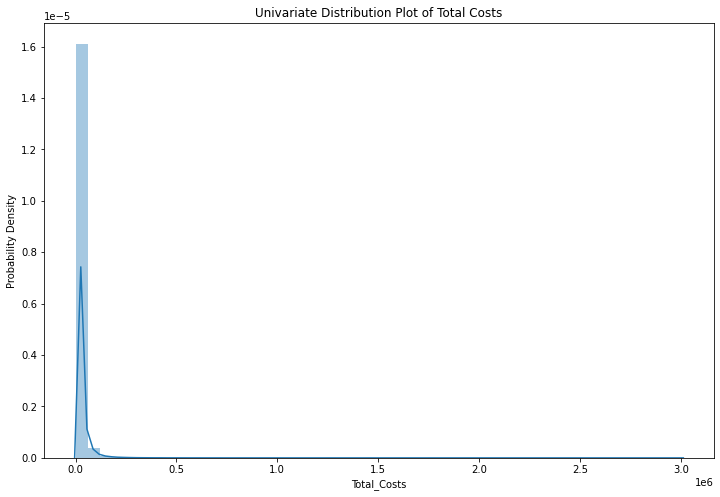

In [26]:
# univariate distribution of total cost
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.distplot(df.Total_Costs);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Total Costs')
plt.show();

Looking at the plot, it is evident that the Total_Costs is very right-skewed, with most of the total costs are between 0 and 15000. Nevertheless, there are few procedures costing above three million of dollars. In general, we would implement some form of transformation to take care of skewness to help us design a better-fitting model. However, for now, we will let it go.

### Part 2: Which procedures have the highest average total costs?

In [27]:
#create new dataframe using groupby function and 
#get mean, max and min cost for each procedure
diag_cost_df = df.groupby('CCS_Procedure_Description') \
                .agg(count = ('CCS_Procedure_Description','size'),
                    avg_cost=( 'Total_Costs','mean' ),
                    max_cost = ('Total_Costs', 'max'),
                    min_cost = ('Total_Costs', 'min')).reset_index()
diag_cost_df.sort_values(by='avg_cost', ascending=False, ignore_index=True, inplace=True)

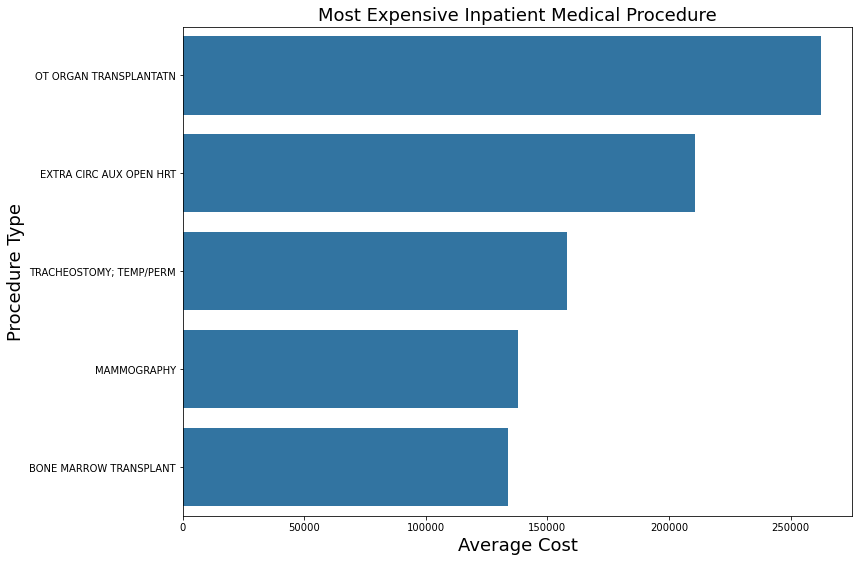

In [28]:
#plot bar chart for top five most expensive average cost 
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(y="CCS_Procedure_Description", x="avg_cost", data=diag_cost_df[0:5],
                color=sns.color_palette()[0],
                ci=None)
ax.set_ylabel("Procedure Type", fontsize=18) 
ax.set_xlabel("Average Cost", fontsize=18) 
plt.title('Most Expensive Inpatient Medical Procedure',fontsize=18);

Based on our data, patients who have undergone procedures such as organ transplant, open heart surgery, tracheostomy, mammography, and bone marrow transplant have the highest average total cost. We see that, organ transplant procedure has an average cost of about $260,000. In the next questions, we will look at some features from our dataset to understand how each feature might influence the total costs.

### Part 3: Which features contribute most to the total costs?

In order to understand how a feature contributes to the total cost, we will look at the numerical and categorical variables separately. 

**Numerical Attributes**: Let's look at the numerical attributes and their correlation with each other. We will use a heatmap to visualize this correlation.

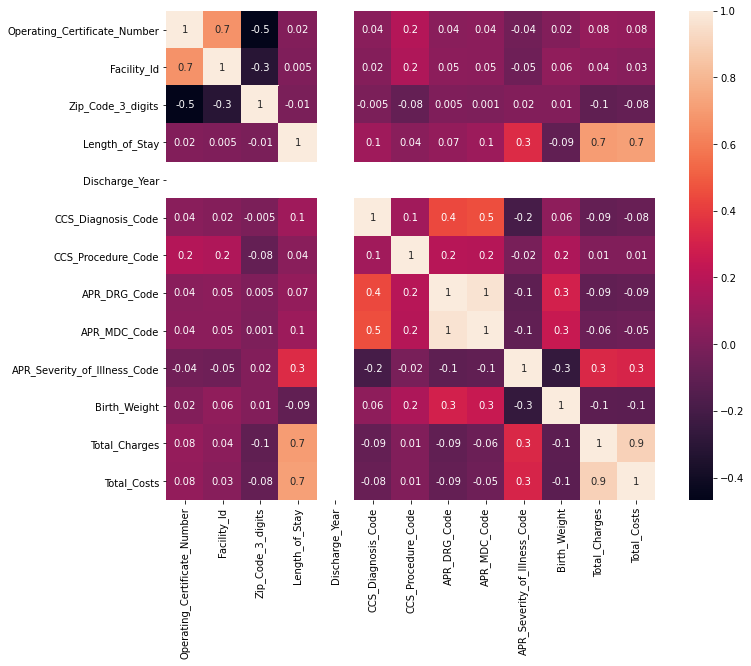

In [29]:
#heatmap to display correlation between the various numeric values.
corr = df[num].corr()
plt.subplots(figsize=(12,9));
sns.heatmap(corr, square=True,annot=True, fmt='.1g');

From the above correlation heatmap plot, we can state that features such as Length_of_stay and APR_Severity_of_Illness_Code have a strong positive correlation with Total_Costs, thus contributing most toward the total costs. Other features such as Facility_Id and CCS_Procedure_Code have a slight positive correlation with Total_Costs.

**Categorical Attributes**: Using heatmap, it was fairly simple to look at the correlation between various numerical attributes at once. However, for the categorical attributes, we will examine a relationship with Total_Costs individually using boxplots. I am mostly interested in features such as APR_Risk_of_Mortality, APR_Severity_of_Illness_Description, Type_of_Admission, Payment_Typology_1, Age_Group, and Race. I will look for significant variance in average Total_Costs for each feature to understand their contribution toward the total cost.

In [30]:
# since we will plot severl box plots, lets create a function
# to plot box plot
# in boxplot, we will limit ylim to 60000
def plot_box(x, y, title, xlabel, ylabel="Total Costs", order=None, rotation=0):
    """
    Generates and prints box plot
    args:
        x: x variable
        y: y variable
        title: plot title
        xlabel: x-axis label text
        ylabel: y-axis label text
        order: Order to plot the categorical levels in
        rotation: angle of rotation for the x-axis ticks
    return:
        None
    """
    f, ax = plt.subplots(figsize=(11, 9))
    sns.boxplot(x=x,
                y=y,
                color=sns.color_palette()[0],
                order=order
                )
    ax.set(ylim=(0, 60000))
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=rotation);
    plt.show()

- Total costs vs APR risk of mortality

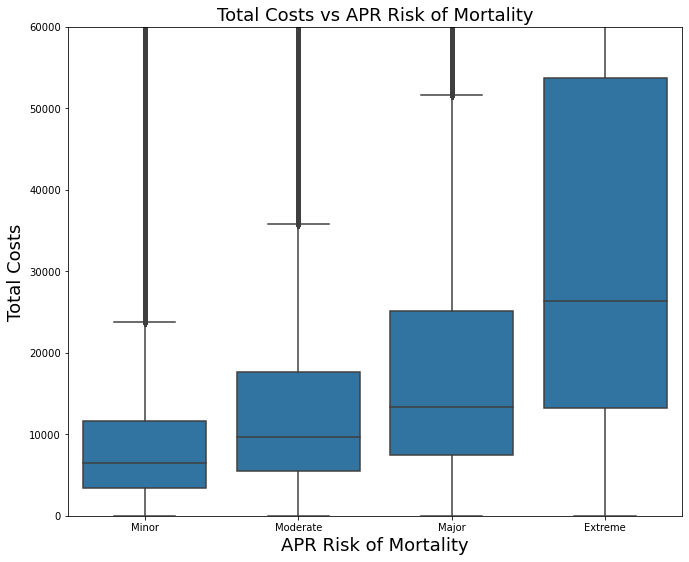

In [31]:
#create box plot for Total costs vs APR risk of mortality
plot_box(x=df.APR_Risk_of_Mortality, y=df.Total_Costs, 
        title='Total Costs vs APR Risk of Mortality',
        xlabel='APR Risk of Mortality')

Here, we can see that patient's risk of mortality rank does result in different average total cost. Patient's who have extreme mortality rank have the highest average total cost.

- Total costs vs APR severity of illness

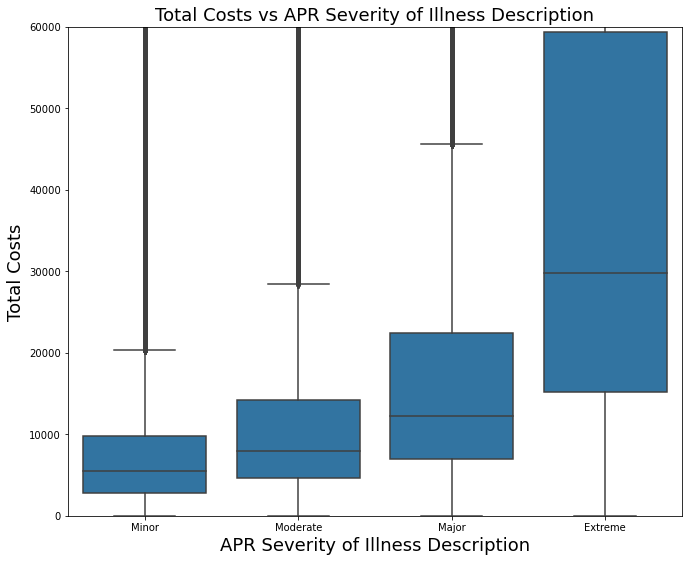

In [32]:
#create box plot for Total costs vs APR severity of illness
severity_order = ['Minor', 'Moderate', 'Major', 'Extreme']
plot_box(x=df.APR_Severity_of_Illness_Description, y=df.Total_Costs, 
        title='Total Costs vs APR Severity of Illness Description',
        xlabel='APR Severity of Illness Description',
        order=severity_order)

Similar to risk of mortality, patients average total cost gets higher as their severity of illness rank goes higher.

- Total costs vs the patient's admission type

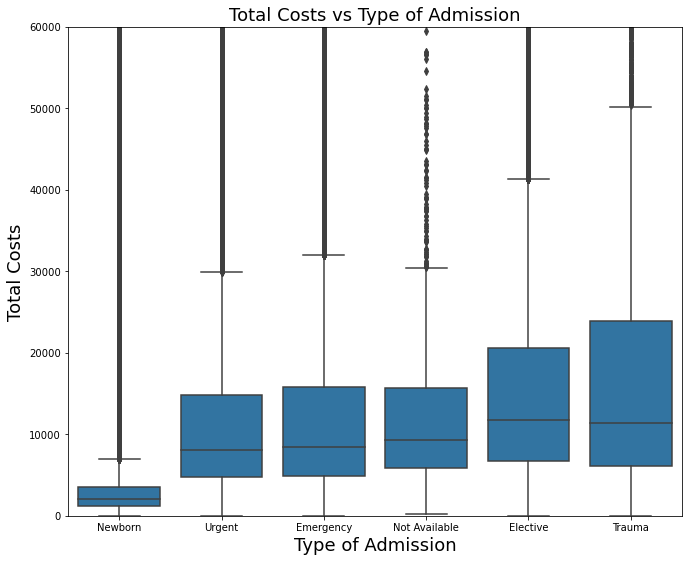

In [33]:
#create box plot for Total costs vs the patient's admission type
admission_order = ['Newborn', 'Urgent', 'Emergency', 'Not Available', 'Elective', 'Trauma']
plot_box(x=df.Type_of_Admission, y=df.Total_Costs, 
        title='Total Costs vs Type of Admission',
        xlabel='Type of Admission',
        order=admission_order)

Type of Admission is also highly correlated to the medical cost. We can see that in average patients who are admited through trauma center will have higher total cost than patients admited through urgent care.

- Total_Costs vs Payment_Typology_1

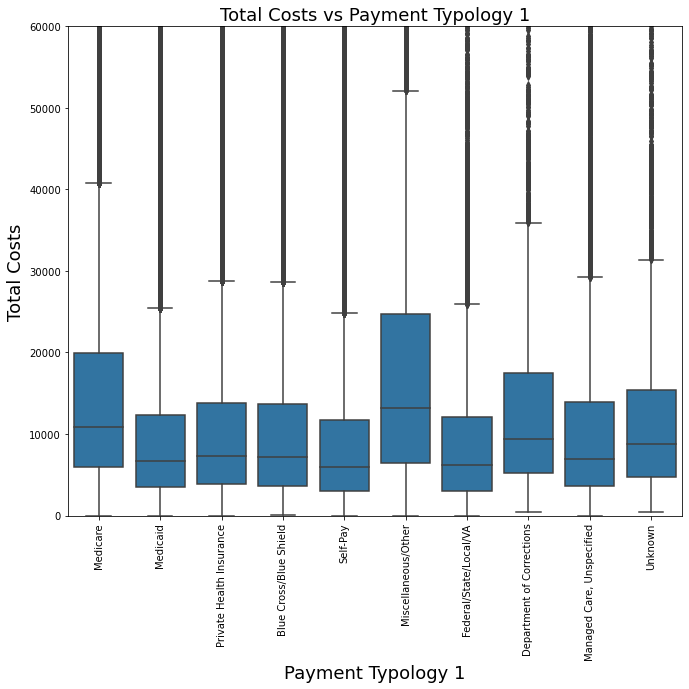

In [34]:
#plot for Total_Costs vs Payment_Typology_1
plot_box(x=df.Payment_Typology_1, y=df.Total_Costs, 
        title='Total Costs vs Payment Typology 1',
        xlabel='Payment Typology 1', rotation=90)

From the above plot, we can see that Payment Typology 1 contributes significantly to the medical cost. In general, patient with different payment typology will have on average different medical cost.

- Total_Costs vs Age_Group

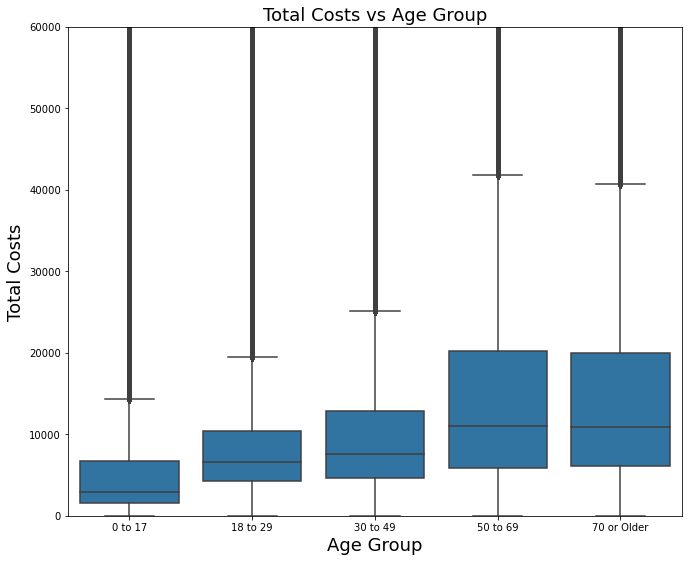

In [35]:
#create box plot for Total costs vs the patient's age group
age_group_order = ['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older']
plot_box(x=df.Age_Group, y=df.Total_Costs, 
        title='Total Costs vs Age Group',
        xlabel='Age Group',
        order=age_group_order)

The above boxplot suggest that age is also is significant contributor to the total cost. We see that patients in older age group have on average higher medical cost than those who are younger. 

- Total_Costs vs Race

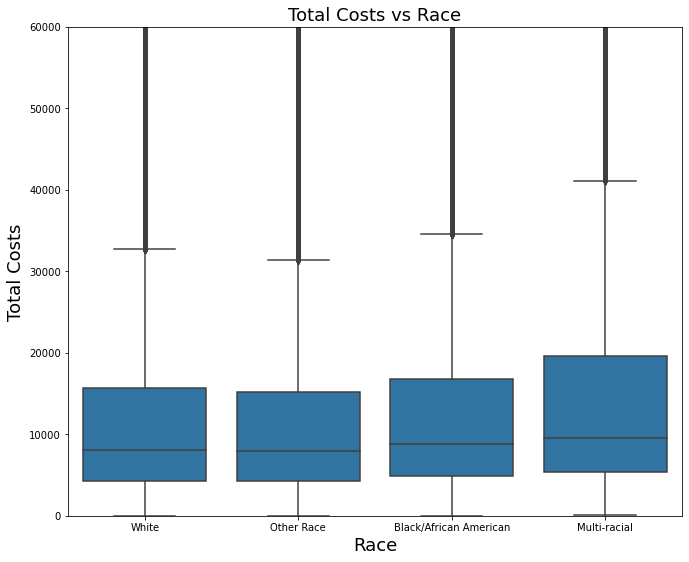

In [36]:
#plot for Total_Costs vs Race
plot_box(x=df.Race, y=df.Total_Costs, 
        title='Total Costs vs Race',
        xlabel='Race')

Finally, we can notice that race does not have as much influence on the total medical cost. On average, the medical costs are the same across all races.